## Causal Effect of Amazon Warehouses on Employment and Wage

#### Name: Scott Kim <br> Email: [scott.kim@stern.nyu.edu](scott.kim@stern.nyu.edu) 

** Summary and Background: ** <br> The aim of this project will be to estimate the causal effect of amazon facilities on unemployment and wage. The inspiration for this project came from The Economist [article](https://www.economist.com/news/united-states/21735020-worlds-largest-online-retailer-underpaying-its-employees-what-amazon-does-wages) that we read in class during this semester. This article detailed how once Amazon opened up a warehousing facility in Lexington County, South Carolina, total employment in the warehousing and storage industry increased sharply while wage unexpectedly dropped. While the infographic paints an interesting tale, a lot of variables weren't mentioned and thus left me with many questions. Did the total employment increase because Amazon brought with it employers from other states? Or did it increase because employees from other industries, or even similar industries, joined Amazon's warehouse? If it were either of these reasons, the benefit of Amazon's job creation seems to be a surface level effect. Perhaps unrelated to these reasons though, the boost in employment could have simply been a result from a general rising trend in employment throughout the state. 

While I don't have the resources to answer all of these questions, my research project hopes to answer these types of questions. It will first focus on identifying a similar effect for all of the counties that have been exposed to new Amazon warehouses. It is very possible that the type of trend we saw in Lexington County was specific only to Lexington County. Before I answer any of these harder questions mentioned before, this is one I plan to address first.

Afterwards, I plan to construct a panel data set that would allows me to construct a fixed effects regressions. I believe this is necessary because I highly doubt Amazon's choice in the location for their warehouses was random. What this type of regression would allow me to do is to filter out any state or county specific trends in the data, so that I may see the causal economic impact of Amazon's facilities.

** Data: ** <br> The data that I will use in this project comes from three main sources:

1) ** [Bureau of Economic Analysis](https://www.bea.gov/API/bea_web_service_api_user_guide.htm): ** The data from the Bureau of Economic Analysis will be the foundation for this project. With it, I am able to access the total employment and compensation of workers across counties and years from 2001 to 2014 within the transportation and warehousing industry.

The two TableNames and their respective keys that I've used in this project are listed below.

* CA25N - Total Full-Time and Part-Time Employment by NAICS Industry
* CA6N - Compensation of Employees by NAICS Industry
* Key 800 - Private nonfarm employment: Transportation and warehousing (NAICS:48-49)

2) ** [MWPVL International](http://www.mwpvl.com/html/amazon_com.html): ** MWPVL International is a specialized supply chain, logistics, and distribution firm that has compiled a data set on Amazon's warehouses. This data set details the size, location, type, and the year opened of all the warehouses. With this data, I'm able to locate which counties were treated with Amazon warehouses in which year, and thus am able to identify the before and after effects of these facilities across all affected counties. However, the website is protected and will not allow me to copy the data. Because of this consideration, I have decided to use only the data on * The Amazon Fulfillment Center and Distribution Center Network in the United States * within this project.

3) ** [Bureau of Labor Statistics](https://www.bls.gov/data/): ** The data from the Bureau of Labor Statistics shares similar attributes to the data from the Bureau of Economic Analysis. With it, I am able to access the total employment and compensation of workers across counties and years until as recently as 2016. However, due to the manual labour this method of data extraction requires, I will use this data set only to replicate the figure seen in The Economist article. 

The keys and specifications for the manipulation of these data sets are listed below.

* ENU45063105493 - Quarterly Census of Employment and Wages --> 493 NAICS 493 Warehousing and storage --> 45063 Lexington County, South Carolina --> Private --> All Employees --> All establishment sizes
* ENU45063405493 - Quarterly Census of Employment and Wages --> 493 NAICS 493 Warehousing and storage --> 45063 Lexington County, South Carolina --> Private --> Average Weekly Wage --> All establishment sizes

---
** Import packages that are necessary for the project: **

In [1]:
import pandas as pd              # to create and manipulate DataFrames
import numpy as np               # to better handle numbers
import requests                  # to extract data from APIs
import matplotlib.pyplot as plt  # to plot visually appealing graphs
import matplotlib as mpl
import weightedcalcs as wc       # to better run statistical processes

---
### Bureau of Labor Statistics

I want to start this project by trying to mimic The Economist's figure in the aforementioned article. To perfectly replicate this, and to ensure that my process is right, I've used data from the Bureau of Labor Statistics.

** Read in Lexington County data: **

In [2]:
lexington_wage = pd.read_csv("https://raw.githubusercontent.com/scottjmkim/Data_Bootcamp_Final_Project/master/data/ENU45063405493.csv")
lexington_employment = pd.read_csv("https://raw.githubusercontent.com/scottjmkim/Data_Bootcamp_Final_Project/master/data/ENU45063105493.csv")

** Contextualize and clean the data: **

In [3]:
lexington_wage.rename(columns = {"Annual": "Weekly Wage"}, inplace = True)
lexington_employment.rename(columns = {"Annual": "Total Employment"}, inplace = True)

sc_lexington = pd.merge(lexington_wage, lexington_employment,on = "Year")

sc_lexington["Total Employment"] = sc_lexington["Total Employment"] / 1000
sc_lexington["Weekly Wage"] = sc_lexington["Weekly Wage"]

sc_lexington.set_index("Year", inplace = True)

sc_lexington

,Weekly Wage,Total Employment
Year,,
2004,686,0.118
2005,690,0.126
2006,601,0.207
2007,731,0.261
2008,738,0.240
2009,891,0.139
2010,849,0.147
2011,823,0.278
2012,697,1.062


** Plot the data as shown by The Economist: **

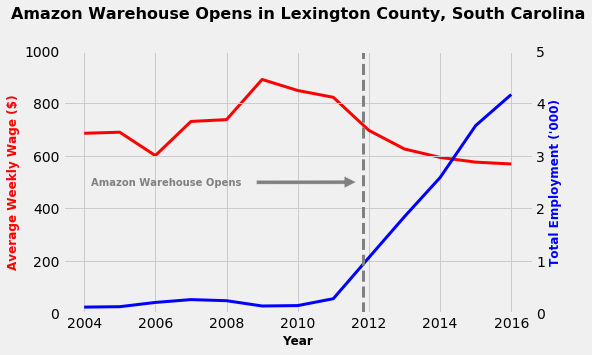

In [5]:
fig, ax1 = plt.subplots(figsize = (7.5, 4.5))

ax2 = ax1.twinx()

sc_lexington["Weekly Wage"].plot(ax = ax1, color = "r", linewidth = 3.0, label = "Average Weekly Wage")
sc_lexington["Total Employment"].plot(ax = ax2, color = "b", linewidth = 3.0, label = "Total Employment")

ax1.set_title("Amazon Warehouse Opens in Lexington County, South Carolina", fontsize = 16, fontweight = "bold")
ax1.title.set_position([.5, 1.1])

ax1.set_xlabel("Year", fontsize = 12, fontweight = "bold")
ax1.set_ylabel("Average Weekly Wage ($)", color = "r", fontsize = 12, fontweight = "bold")
ax2.set_ylabel("Total Employment ('000)", color = "b", fontsize = 12, fontweight = "bold")

ax1.set_ylim(0, 1000)
ax2.set_ylim(0, 5)

plt.axvline(x = 2011.83, color = "gray", linewidth = 3.0, linestyle = "--")

ax1.annotate("Amazon Warehouse Opens", 
             xy=(2012, 500), 
             xytext=(2004.2, 488), 
             fontsize = 10,
             fontweight = "bold", 
             color = "gray", 
             arrowprops = dict(facecolor = "gray", shrink = 0.10))

plt.style.use("fivethirtyeight")

# mpl.rcParams.update(mpl.rcParamsDefault)
# %matplotlib inline

plt.show()

Here we see that the figure is almost identical to the one we saw in The Economist article. We see the recurring trend of employment and wage increasing and decreasing respectively upon an Amazon warehouse appearing. 

Unfortunately, as mentioned before I do not currently have a wage of retrieving the data for all counties simultaneously from the BLS. Therefore, moving forward I will be using data from the Bureau of Economic Analysis. This data does not contain data that is as specific to the industry *493 NAICS 493 Warehousing and storage*. Instead, it contains data on the broader category *Transportation and warehousing (NAICS:48-49)*. However, as we will find out later on, this allows us to further ascertain the nature of the shift of employment in the figure above.

---
### Bureau of Economic Analysis

Fortunately, the Bureau of Economic Analysis allows for the easy aggregation of data on the county and industry level. Going forward in the project, the data from the BEA will be used instead of the BLS data as it allows for more efficient analyses with more data entries, resulting in a higher accuracy as well.

** Set up variables required to access the Bureau of Economic Analysis's API. Once that is done, look for the key for the warehousing industry: **

In [6]:
BEA_ID = "72DF5D45-977D-49AC-B6D8-9D485484C815"

my_key = "https://bea.gov/api/data?&UserID=" + BEA_ID + "&"

data_set = "datasetname=RegionalIncome&"

method = "method=GetParameterValuesFiltered&"

dataset = "datasetname=RegionalIncome&"

linecode = "TargetParameter=LineCode&"

tablename = "TableName=CA25N&"

location = "GeoFips=COUNTY&"

form = "ResultFormat=json"

API_URL = my_key + method + dataset + linecode + tablename + form

r = requests.get(API_URL)

r.json()["BEAAPI"]["Results"]

{'ParamValue': [{'Desc': '[CA25N] Total employment', 'Key': '10'},
  {'Desc': '[CA25N] Private nonfarm employment: Forestry, fishing, and related activities (NAICS:113-115)',
   'Key': '100'},
  {'Desc': '[CA25N] Private nonfarm employment: Finance and insurance (NAICS:52)',
   'Key': '1000'},
  {'Desc': '[CA25N] Private nonfarm employment: Real estate and rental and leasing (NAICS:53)',
   'Key': '1100'},
  {'Desc': '[CA25N] Private nonfarm employment: Professional, scientific, and technical services (NAICS:54)',
   'Key': '1200'},
  {'Desc': '[CA25N] Private nonfarm employment: Management of companies and enterprises (NAICS:55)',
   'Key': '1300'},
  {'Desc': '[CA25N] Private nonfarm employment: Administrative and support and waste management and remediation services (NAICS:56)',
   'Key': '1400'},
  {'Desc': '[CA25N] Private nonfarm employment: Educational services (NAICS:61)',
   'Key': '1500'},
  {'Desc': '[CA25N] Private nonfarm employment: Health care and social assistance (NAIC

** Adjust the variables to now extract the data into a Pandas DataFrame: **

In [7]:
my_key = "https://bea.gov/api/data?&UserID=" + BEA_ID + "&method=GetData&"

table_and_line_employment = "TableName=CA25N&LineCode=800&"

API_URL = my_key + data_set + table_and_line_employment + location + form

r_total_employment = requests.get(API_URL)

df_total_employment = pd.DataFrame(r_total_employment.json()["BEAAPI"]["Results"]["Data"])

df_total_employment.head()

,CL_UNIT,Code,DataValue,GeoFips,GeoName,NoteRef,TimePeriod,UNIT_MULT
0,number of jobs,CA25N-800,6939700,00000,United States,NaN,2015,0
1,number of jobs,CA25N-800,6020800,00000,United States,NaN,2013,0
2,number of jobs,CA25N-800,6291400,00000,United States,NaN,2014,0
3,number of jobs,CA25N-800,5872400,00000,United States,NaN,2012,0
4,number of jobs,CA25N-800,7169400,00000,United States,NaN,2016,0


** Make the list of years applicable for the scope of this project (2001 to 2014): **

In [8]:
years = range(2001, 2015)
years = list(years)

years = "".join(str(years))

years = years[1:-1]

** Include the list of years as a variable when retrieving data: **

In [9]:
year = "Year=" + years + "&"

API_URL = my_key + data_set + table_and_line_employment + year + location + form

r = requests.get(API_URL)

df_total_employment = pd.DataFrame(r.json()["BEAAPI"]["Results"]["Data"])

r_total_employment = requests.get(API_URL)

df_total_employment = pd.DataFrame(r_total_employment.json()["BEAAPI"]["Results"]["Data"])

df_total_employment.head()

,CL_UNIT,Code,DataValue,GeoFips,GeoName,NoteRef,TimePeriod,UNIT_MULT
0,number of jobs,CA25N-800,5474200,00000,United States,NaN,2010,0
1,number of jobs,CA25N-800,5480000,00000,United States,NaN,2001,0
2,number of jobs,CA25N-800,5567200,00000,United States,NaN,2009,0
3,number of jobs,CA25N-800,5949900,00000,United States,NaN,2007,0
4,number of jobs,CA25N-800,5359300,00000,United States,NaN,2002,0


** Clean the DataFrame by dropping and renaming some columns: **

In [10]:
df_total_employment.drop(['CL_UNIT', 'Code',"NoteRef", "UNIT_MULT"], axis=1, inplace = True)

df_total_employment.rename(columns = {"DataValue":"TotalEmployment", "TimePeriod": "Year"}, inplace = True)

df_total_employment.head()

,TotalEmployment,GeoFips,GeoName,Year
0,5474200,00000,United States,2010
1,5480000,00000,United States,2001
2,5567200,00000,United States,2009
3,5949900,00000,United States,2007
4,5359300,00000,United States,2002


---
** Now do the same for personal income: **

In [11]:
table_and_line_income = "TableName=CA6N&LineCode=800&"

API_URL = my_key + data_set + table_and_line_income + year + location + form

r_income = requests.get(API_URL)

df_income = pd.DataFrame(r_income.json()["BEAAPI"]["Results"]["Data"])

df_income.drop(['CL_UNIT', 'Code',"NoteRef", "UNIT_MULT"], axis=1, inplace = True)

df_income.rename(columns = {"DataValue":"Income", "TimePeriod": "Year"}, inplace = True)

df_income.head()

,Income,GeoFips,GeoName,Year
0,206248000,00000,United States,2002
1,221951000,00000,United States,2004
2,241065000,00000,United States,2006
3,255476000,00000,United States,2008
4,245732000,00000,United States,2010


Unfortunately, the BEA does not have data on the average income per worker for each industry. Since no data set exists, we must find the next best alternative. As we have the total amount of workers per county for each year, we can average it out using the two DataFrames later on.

Furthermore, the figures are listed in thousands of dollars. This is something we can remedy easily later on.

---
** Now merge both DataFrames into one: **

In [12]:
master = pd.merge(df_total_employment, df_income,
                 how = "inner",
                 on = ["GeoFips", "Year", "GeoName"],
                 indicator = True)

** Clean the DataFrame of any invalid strings and set variables as floats: **

In [13]:
master["TotalEmployment"].replace(["(NA)", "(D)", "(L)"], np.nan, inplace = True)
master["TotalEmployment"] = master["TotalEmployment"].astype(float)

master["Income"].replace(["(NA)", "(D)", "(L)"], np.nan, inplace = True)
master["Income"] = master["Income"].astype(float)

# master["Year"] = pd.to_datetime(master["Year"], infer_datetime_format = True)
master["Year"] = master["Year"].astype(float)

** Make a new column finding the average income: **

In [14]:
master["AverageIncome"] = master["Income"] * 1000 / master["TotalEmployment"]

master.drop(["Income"], axis=1, inplace = True)
master.drop(["_merge"], axis = 1, inplace = True)

master.head()

,TotalEmployment,GeoFips,GeoName,Year,AverageIncome
0,5474200.0,00000,United States,2010.0,44889.116218
1,5480000.0,00000,United States,2001.0,37951.642336
2,5567200.0,00000,United States,2009.0,43338.841788
3,5949900.0,00000,United States,2007.0,42997.697440
4,5359300.0,00000,United States,2002.0,38484.130390


We can now drop the * Income * column as we have the average income data.

** Now Clean the data more and include new columns of CountyFips and Treated: **

In [15]:
master["CountyFips"] = master["GeoFips"].str[2:]
master["Treated"] = 0
master["TreatedDate"] = 0

master = master[master["CountyFips"] != "000"]

master.head()

,TotalEmployment,GeoFips,GeoName,Year,AverageIncome,CountyFips,Treated,TreatedDate
28,297.0,01001,"Autauga, AL",2010.0,23983.164983,001,0,0
29,349.0,01001,"Autauga, AL",2001.0,23401.146132,001,0,0
30,295.0,01001,"Autauga, AL",2009.0,22928.813559,001,0,0
31,391.0,01001,"Autauga, AL",2007.0,26961.636829,001,0,0
32,331.0,01001,"Autauga, AL",2002.0,24468.277946,001,0,0


We include CountyFips so that we can drop all unwanted entries of either all of the United States, or individual states themselves. We're also setting Treated = 0 for all entries now, which we will edit later to indicate which counties have been treated with an Amazon warehouse.

** Set the index to each county and sort the DataFrame by time: **

In [16]:
master.sort_values(by = "Year", inplace = True)

master.set_index(["GeoFips", "Year"], inplace = True)
master.sort_index(level = "GeoFips", inplace = True)

master.head(20)

TotalEmployment      GeoName  AverageIncome CountyFips  \
GeoFips Year                                                             
01001   2001.0            349.0  Autauga, AL   23401.146132        001   
        2002.0            331.0  Autauga, AL   24468.277946        001   
        2003.0            342.0  Autauga, AL   24207.602339        001   
        2004.0            313.0  Autauga, AL   27153.354633        001   
        2005.0            359.0  Autauga, AL   25632.311978        001   
        2006.0            390.0  Autauga, AL   27569.230769        001   
        2007.0            391.0  Autauga, AL   26961.636829        001   
        2008.0            318.0  Autauga, AL   21726.415094        001   
        2009.0            295.0  Autauga, AL   22928.813559        001   
        2010.0            297.0  Autauga, AL   23983.164983        001   
        2011.0            363.0  Autauga, AL   22234.159780        001   
        2012.0            352.0  Autauga, AL   23315.340909        001   
        2013.0            356.0  Autauga, AL   21966.292135        001   
        2014.0            350.0  Autauga, AL   20614.285714        001   
01003   2001.0           1454.0  Baldwin, AL   21136.176066        003   
        2002.0           1331.0  Baldwin, AL   21206.611570        003   
        2003.0           1451.0  Baldwin, AL   22716.057891        003   
        2004.0           1491.0  Baldwin, AL   23183.098592        003   
        2005.0           1493.0  Baldwin, AL   24325.519089        003   
        2006.0           1475.0  Baldwin, AL   24399.322034        003   

                Treated  TreatedDate  
GeoFips Year                          
01001   2001.0        0            0  
        2002.0        0            0  
        2003.0        0            0  
        2004.0        0            0  
        2005.0        0            0  
        2006.0        0            0  
        2007.0        0            0  
        2008.0        0            0  
        2009.0        0            0  
        2010.0        0            0  
        2011.0        0            0  
        2012.0        0            0  
        2013.0        0            0  
        2014.0        0            0  
01003   2001.0        0            0  
        2002.0        0            0  
        2003.0        0            0  
        2004.0        0            0  
        2005.0        0            0  
        2006.0        0            0

---
** Make a separate DataFrame of just Lexington County, South Carolina: **

In [17]:
sc_lexington1 = master.loc["45063"]

sc_lexington1

,TotalEmployment,GeoName,AverageIncome,CountyFips,Treated,TreatedDate
Year,,,,,,
2001.0,5529.0,"Lexington, SC",33056.429734,063,0,0
2002.0,5111.0,"Lexington, SC",33051.457640,063,0,0
2003.0,5253.0,"Lexington, SC",35240.434038,063,0,0
2004.0,5352.0,"Lexington, SC",38742.339312,063,0,0
2005.0,6084.0,"Lexington, SC",40236.686391,063,0,0
2006.0,6398.0,"Lexington, SC",39107.846202,063,0,0
2007.0,6606.0,"Lexington, SC",40119.588253,063,0,0
2008.0,5947.0,"Lexington, SC",39767.277619,063,0,0
2009.0,5207.0,"Lexington, SC",41424.620703,063,0,0


** Now plot a similar figure to the one we assembled in the beginning where we used the BLS data: **

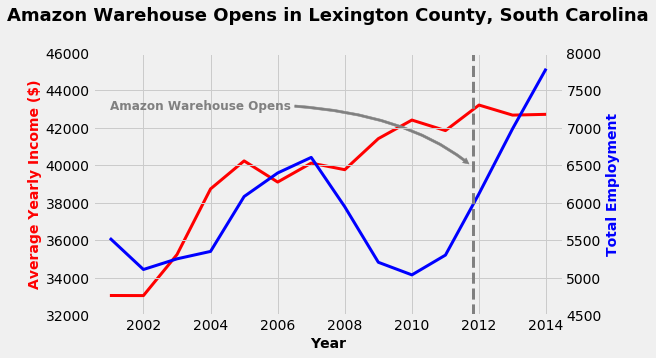

In [18]:
fig, ax1 = plt.subplots(figsize = (7.5, 4.5))

ax2 = ax1.twinx()

sc_lexington1["AverageIncome"].plot(ax = ax1, color = "r", linewidth = 3.0, label = "Average Income")
sc_lexington1["TotalEmployment"].plot(ax = ax2, color = "b", linewidth = 3.0, label = "Total Employment")

ax1.set_title("Amazon Warehouse Opens in Lexington County, South Carolina", fontsize = 18, fontweight = "bold")
ax1.title.set_position([.5, 1.1])

ax1.set_xlabel("Year", fontsize = 14, fontweight = "bold")
ax1.set_ylabel("Average Yearly Income ($)", color = "r", fontsize = 14, fontweight = "bold")
ax2.set_ylabel("Total Employment", color = "b", fontsize = 14, fontweight = "bold")

ax1.set_ylim(32000, 46000)
ax1.set_xlim(2000.5, 2014.5)
ax2.set_ylim(4500, 8000)

plt.axvline(x = 2011.83, color = "gray", linewidth = 3.0, linestyle = "--")

ax1.annotate("Amazon Warehouse Opens", 
             xy = (2011.75, 40000), 
             xytext = (2001, 43000), 
             fontsize = 12,
             fontweight = "bold", 
             color = "gray", 
             arrowprops = {
                 "arrowstyle": "simple",
                 "connectionstyle": "angle3, angleA = 3, angleB = 140",
                 "color": "gray"})

plt.show()

Now that we have another version of the Lexington County graph, we can start to compare some details and draw further conclusions. This new graph is using data from not just the *493 NAICS 493 Warehousing and storage* industry, but also from every other industry in the broad category of *Transportation and warehousing (NAICS:48-49)* (as a consequence of the nature of the data sets available.

Thus, any change in employment will be a reflection of the entire related industry, and not just the specific industry of Warehousing and storage. Here we see from 2012 until 2014, there was roughly a 2800 increase in total employment in the *Transporation and warehousing* industry. From our previous graph, we see that there was just over a 3000 increase in total employment in just the *Warehousing and storage* industry alone. This is suggestive that there were very little employment coming into the *Warehousing and storage* industry from closely related industries, at least within Lexington County.

---
### Time Series

Unfortunately, the previous graph as it is only depicts the scenario for Lexington County, South Carolina only. This could be a misrepresentation of data, as Lexington County could be the only county to show such results. To gain a more holistic understanding of the causal impact of Amazon warehouses, we aim to find the average change in total employment and wages from 2 years before and after an Amazon warehouse is introduced in all counties. 

This will allow us to have a better idea of what the average impact of Amazon warehouses given a random county. We will add touches later on to make this proposed figure even more informative.

**First, read in the csv. file constructed from the MWPVL data set:**

In [19]:
mwpvl = pd.read_csv("https://raw.githubusercontent.com/scottjmkim/Data_Bootcamp_Final_Project/master/data/MWPVL.csv")

mwpvl

,GeoFips,County,State,Year Opened
0,4013,Maricopa,Arizona,2007
1,4013,Maricopa,Arizona,2008
2,4013,Maricopa,Arizona,2010
3,4013,Maricopa,Arizona,2011
4,6071,San Bernardino,California,2012
5,10003,New Castle,Delaware,2012
6,18011,White,Indiana,2008
7,18063,Hendricks,Indiana,2008
8,18097,Marion,Indiana,2011
9,18063,Hendricks,Indiana,2011


**Note all counties that were treated with Amazon facilities, and also in which year they were treated:**

In [20]:
# Maricopa County, Arizona
master.loc["04013", "Treated"] = 1
master.loc["04013", "TreatedDate"] = 6

# San Bernardino County, California
master.loc["06071", "Treated"] = 1
master.loc["06071", "TreatedDate"] = 11

# New Castle County, Delaware
master.loc["10003", "Treated"] = 1
master.loc["10003", "TreatedDate"] = 11

# White County, Indiana
master.loc["18011", "Treated"] = 1
master.loc["18011", "TreatedDate"] = 8

# Hendricks County, Indiana
master.loc["18063", "Treated"] = 1
master.loc["18063", "TreatedDate"] = 8

# Marion County, Indiana
master.loc["18097", "Treated"] = 1
master.loc["18097", "TreatedDate"] = 10

# Clark County, Indiana
master.loc["18019", "Treated"] = 1
master.loc["18019", "TreatedDate"] = 11

# Boone County, Kentucky
master.loc["21015", "Treated"] = 1
master.loc["21015", "TreatedDate"] = 4

# Fayette County, Kentucky
master.loc["21067", "Treated"] = 1
master.loc["21067", "TreatedDate"] = 4

# Jefferson County, Kentucky
master.loc["21111", "Treated"] = 1
master.loc["21111", "TreatedDate"] = 4

# Bullitt County, Kentucky
master.loc["21029", "Treated"] = 1
master.loc["21029", "TreatedDate"] = 11

# Clark County, Nevada
master.loc["32003", "Treated"] = 1
master.loc["32003", "TreatedDate"] = 7

# Washoe County, Nevada
master.loc["32031", "Treated"] = 1
master.loc["32031", "TreatedDate"] = 9

# Hillsborough County, New Hampshire
master.loc["33011", "Treated"] = 1
master.loc["33011", "TreatedDate"] = 6

# Lehigh County, Pennsylvania
master.loc["42077", "Treated"] = 1
master.loc["42077", "TreatedDate"] = 9

# Wayne County, Pennsylvania
master.loc["42127", "Treated"] = 1
master.loc["42127", "TreatedDate"] = 9

# Cumberland County, Pennsylvania
master.loc["42041", "Treated"] = 1
master.loc["42041", "TreatedDate"] = 9

# Lexington County, South Carolina
master.loc["45063", "Treated"] = 1
master.loc["45063", "TreatedDate"] = 10

# Spartanburg County, South Carolina
master.loc["45083", "Treated"] = 1
master.loc["45083", "TreatedDate"] = 11

# Rutherford County, Tennessee
master.loc["47149", "Treated"] = 1
master.loc["47149", "TreatedDate"] = 11

# Hamilton County, Tennessee
master.loc["47065", "Treated"] = 1
master.loc["47065", "TreatedDate"] = 10

# Bradley County, Tennessee
master.loc["47011", "Treated"] = 1
master.loc["47011", "TreatedDate"] = 10

# Chesterfield County, Virginia
master.loc["51041", "Treated"] = 1
master.loc["51041", "TreatedDate"] = 11

# Pierce County, Washington
master.loc["53053", "Treated"] = 1
master.loc["53053", "TreatedDate"] = 10

master["TreatedDate"] = master["TreatedDate"].astype(int)

Note how the date I'm using is purely in integers. This is because later on when I define my function, I will be taking advantage of the fact that my years are all standardized to call their indexes appropriately.

Furthermore, there were more counties that were treated with Amazon warehouses, but they did not make it into this phase of the project either because the BEA did not have data on them, or the Amazon warehouses were too recent for an analysis to be made with a data set reaching up until only 2014. 

Furthermore, it is also important to disclose that some counties received multiple warehouses either at the same time or at different times. For simplicity, I've counted the *TreatedDate* as the year in which the first Amazon warehouse opened.

**Now make a new DataFrame that isolates only treated counties:**

In [21]:
master_treated = master.groupby("Treated")

master_treated = master_treated.get_group(int(1))

**Now define functions to return a new transposed DataFrame that shows the level change of employment and income for each county depending on when an Amazon warehouse was opened:**

In [22]:
def delta_employment(df):
    
    data = [df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0] - 2] - df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0]],
            df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0] - 1] - df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0]],
            df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0]] - df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0]],
            df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0] + 1] - df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0]],
            df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0] + 2] - df["TotalEmployment"].iloc[df["TreatedDate"].iloc[0]]]
    
    data = pd.DataFrame(data).T
    
    data.columns = ["-2", "-1", "0", "1", "2"]
    
    return data

In [23]:
def delta_income(df):
    
    data = [df["AverageIncome"].iloc[df["TreatedDate"].iloc[0] - 2] - df["AverageIncome"].iloc[df["TreatedDate"].iloc[0]],
            df["AverageIncome"].iloc[df["TreatedDate"].iloc[0] - 1] - df["AverageIncome"].iloc[df["TreatedDate"].iloc[0]],
            df["AverageIncome"].iloc[df["TreatedDate"].iloc[0]] - df["AverageIncome"].iloc[df["TreatedDate"].iloc[0]],
            df["AverageIncome"].iloc[df["TreatedDate"].iloc[0] + 1] - df["AverageIncome"].iloc[df["TreatedDate"].iloc[0]],
            df["AverageIncome"].iloc[df["TreatedDate"].iloc[0] + 2] - df["AverageIncome"].iloc[df["TreatedDate"].iloc[0]]]
    
    data = pd.DataFrame(data).T
    
    data.columns = ["-2", "-1", "0", "1", "2"]
    
    return data

**Now apply these functions to each county in the DataFrame with only treated counties:**

In [24]:
series = master_treated.groupby("GeoFips")

master_employment = series.apply(delta_employment)

master_employment = master_employment.reset_index().drop(["level_1"], axis = 1).set_index("GeoFips")

master_employment

,-2,-1,0,1,2
GeoFips,,,,,
04013,-6185.0,-1606.0,0.0,-1355.0,-5417.0
06071,-4979.0,-2064.0,0.0,6226.0,12040.0
10003,-694.0,-384.0,0.0,1199.0,2382.0
18011,-242.0,43.0,0.0,-55.0,-111.0
18019,291.0,84.0,0.0,54.0,178.0
18063,-910.0,-521.0,0.0,225.0,134.0
18097,-1336.0,-1309.0,0.0,1087.0,4768.0
21015,-1421.0,555.0,0.0,-2994.0,-3213.0
21029,-2084.0,-1139.0,0.0,102.0,746.0


In [25]:
series = master_treated.groupby("GeoFips")

master_income = series.apply(delta_income)

master_income = master_income.reset_index().drop(["level_1"], axis = 1).set_index("GeoFips")

master_income

,-2,-1,0,1,2
GeoFips,,,,,
04013,-3800.650972,-2235.368825,0.0,-874.655103,-892.400591
06071,-1707.469119,-235.473971,0.0,268.195062,-1084.941836
10003,-3025.546844,-1778.783554,0.0,-1126.578002,-1053.966223
18011,-4115.461128,-1623.740222,0.0,2234.319763,1744.673461
18019,-1673.278078,3256.261360,0.0,834.952838,1219.359809
18063,-1767.962436,-538.256046,0.0,1647.791500,2163.425859
18097,-1037.232935,305.960187,0.0,1697.415345,2189.418347
21015,5596.970016,4182.092509,0.0,-6697.424317,5130.724327
21029,1085.024429,-545.058655,0.0,-482.955374,-2093.097543


**Now transpose both DataFrames and merge them together to see the results:**

In [26]:
mean_employment = pd.DataFrame(master_employment.mean())
mean_income = pd.DataFrame(master_income.mean())

mean_employment.columns = ["Total Employment"]
mean_income.columns = ["Average Income"]

mean_employment.index.name = "Delta Years"
mean_income.index.name = "Delta Years"

mean_employment.reset_index(inplace = True)
mean_income.reset_index(inplace = True)

final = pd.merge(mean_employment, mean_income,
                 how = "inner",
                 on = "Delta Years")

final["Delta Years"] = final["Delta Years"].astype(float)

final.set_index("Delta Years", inplace = True)

final

,Total Employment,Average Income
Delta Years,,
-2.0,-901.541667,-1564.133524
-1.0,-392.833333,-309.600526
0.0,0.000000,0.000000
1.0,504.041667,366.384257
2.0,1133.916667,1165.558307


[Comment Here]

**Now graph it!**

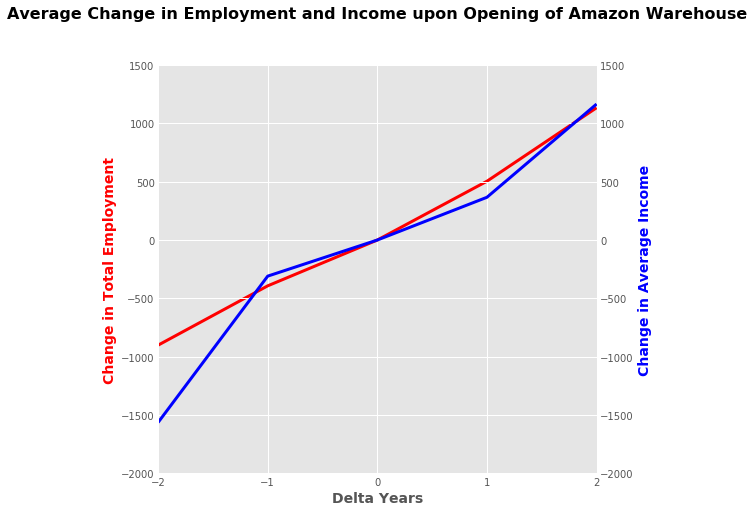

In [28]:
fig, ax1 = plt.subplots(figsize = (7, 7))

ax2 = ax1.twinx()

final["Total Employment"].plot(ax = ax1, color = "r", linewidth = 3.0, label = "Total Employment", xticks = [-2, -1, 0, 1, 2])
final["Average Income"].plot(ax = ax2, color = "b", linewidth = 3.0, label = "Average Income")

ax1.set_title("Average Change in Employment and Income upon Opening of Amazon Warehouse", fontsize = 16, fontweight = "bold")
ax1.title.set_position([.5, 1.1])

ax1.set_xlabel("Delta Years", fontsize = 14, fontweight = "bold")
ax1.set_ylabel("Change in Total Employment", color = "r", fontsize = 14, fontweight = "bold")
ax2.set_ylabel("Change in Average Income", color = "b", fontsize = 14, fontweight = "bold")

ax1.set_xlim(-2, 2)
ax1.set_ylim(-2000, 1500)
ax2.set_ylim(-2000, 1500)

plt.style.use("ggplot")

plt.show()

[Comment Here]

**Retrive the interquartile range statistics of the change in employment and average income: **

In [29]:
employment_quartile = master_employment.describe().T.reset_index()

employment_quartile["Delta Years"] = employment_quartile["Delta Years"].astype(float)

employment_quartile = employment_quartile.drop(["count", "mean", "std", "min", "max"], axis = 1).set_index("Delta Years")

employment_quartile

,25%,50%,75%
Delta Years,,,
-2.0,-1339.50,-417.0,96.5
-1.0,-705.75,-208.5,41.5
0.0,0.00,0.0,0.0
1.0,-1.75,206.5,1115.0
2.0,29.75,695.0,1921.0


In [30]:
income_quartile = master_income.describe().T.reset_index()

income_quartile["Delta Years"] = income_quartile["Delta Years"].astype(float)

income_quartile = income_quartile.drop(["count", "mean", "std", "min", "max"], axis = 1).set_index("Delta Years")

income_quartile

,25%,50%,75%
Delta Years,,,
-2.0,-3108.628768,-1653.686529,-812.525788
-1.0,-1374.663192,-502.838364,430.110930
0.0,0.000000,0.000000,0.000000
1.0,-677.452368,436.300206,1541.167208
2.0,-863.967850,1022.190789,2169.923981


**Now plot them!**

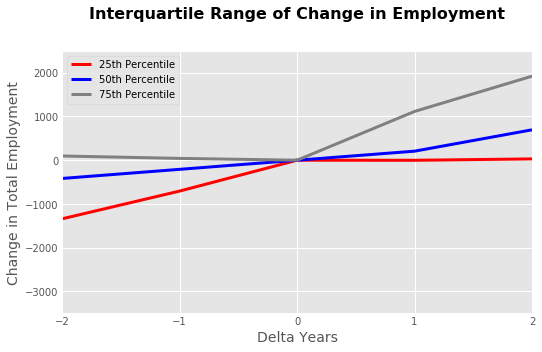

In [33]:
fig, ax  = plt.subplots(figsize = (7.5, 4.5))

employment_quartile["25%"].plot(ax = ax, lw = 3, color = "r", label = "25th Percentile", xticks =[-2, -1, 0, 1, 2])

employment_quartile["50%"].plot(ax = ax, lw = 3, color = "b", label = "50th Percentile")

employment_quartile["75%"].plot(ax = ax, lw = 3, color = "gray", label = "75th Percentile")

ax.set_title("Interquartile Range of Change in Employment", fontsize = 16, fontweight = "bold")
ax.title.set_position([.5, 1.1])

ax.set_xlabel("Delta Years", fontsize = 14)
ax.set_ylabel("Change in Total Employment", fontsize = 14)

ax.set_xlim(-2, 2)
ax.set_ylim(-3500, 2500)

plt.legend()
plt.show()

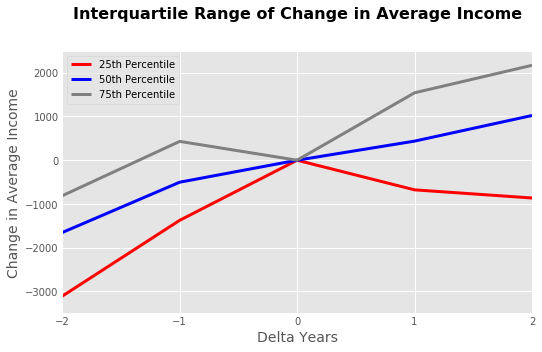

In [34]:
fig, ax  = plt.subplots(figsize = (7.5, 4.5))

income_quartile["25%"].plot(ax = ax, lw = 3, color = "r", label = "25th Percentile", xticks =[-2, -1, 0, 1, 2])

income_quartile["50%"].plot(ax = ax, lw = 3, color = "b", label = "50th Percentile")

income_quartile["75%"].plot(ax = ax, lw = 3, color = "gray", label = "75th Percentile")

ax.set_title("Interquartile Range of Change in Average Income", fontsize = 16, fontweight = "bold")
ax.title.set_position([.5, 1.1])

ax.set_xlabel("Delta Years", fontsize = 14)
ax.set_ylabel("Change in Average Income", fontsize = 14)

ax.set_xlim(-2, 2)
ax.set_ylim(-3500, 2500)

plt.legend()
plt.show()